In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import networkit as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random

from sklearn.preprocessing import StandardScaler
from IPython.display import display, Math, Latex, Markdown
from tqdm.notebook import tqdm

from External.ICT.calculate_ICT import calculate_ICT
from External.clustering import centers
from External.generation import create_graph
from External.plotting import plot_points, plot_graph, no_intersections

plt.style.use('standard.mplstyle')

cv2 package not present. No movies possible


In [5]:
def load_image(filename):
    a=plt.imread(filename+'.png')
    rgb_weights = [0.2989, 0.5870, 0.1140]
    
    grayscale_image = np.dot(a[...,:3], rgb_weights)>0
    
    return grayscale_image
    
    
def sample_points_from_image(n,img,Random=True):
    if not Random:
        random.seed(42)
    non_zero = np.where(img!=0)
    # non_zero=np.vstack((non_zero[0],non_zero[1])).T
    
    
    idx = random.sample(range(len(non_zero[0])),n)
    
    x_coord = non_zero[0][idx]
    y_coord = non_zero[1][idx]
    return x_coord,y_coord

In [15]:
# Hyperparameters
mode = "K_Nearest+Density2"
metric = "euclidean"
dataset = "non_convex"
ICT_algorithm = "cluster_all"

# image loading
n = number_of_nodes = 10000
Random = True
image_name = "image"

# for the filename
parameters = "2-0_5-10000"

sklearn is done: 4.1470396518707275
My own part is done: 0.02797985076904297
Final k: 11


calculating the densities for the density criterion:   0%|          | 0/10000 [00:00<?, ?it/s]

updating the weights:   0%|          | 0/62388 [00:00<?, ?it/s]

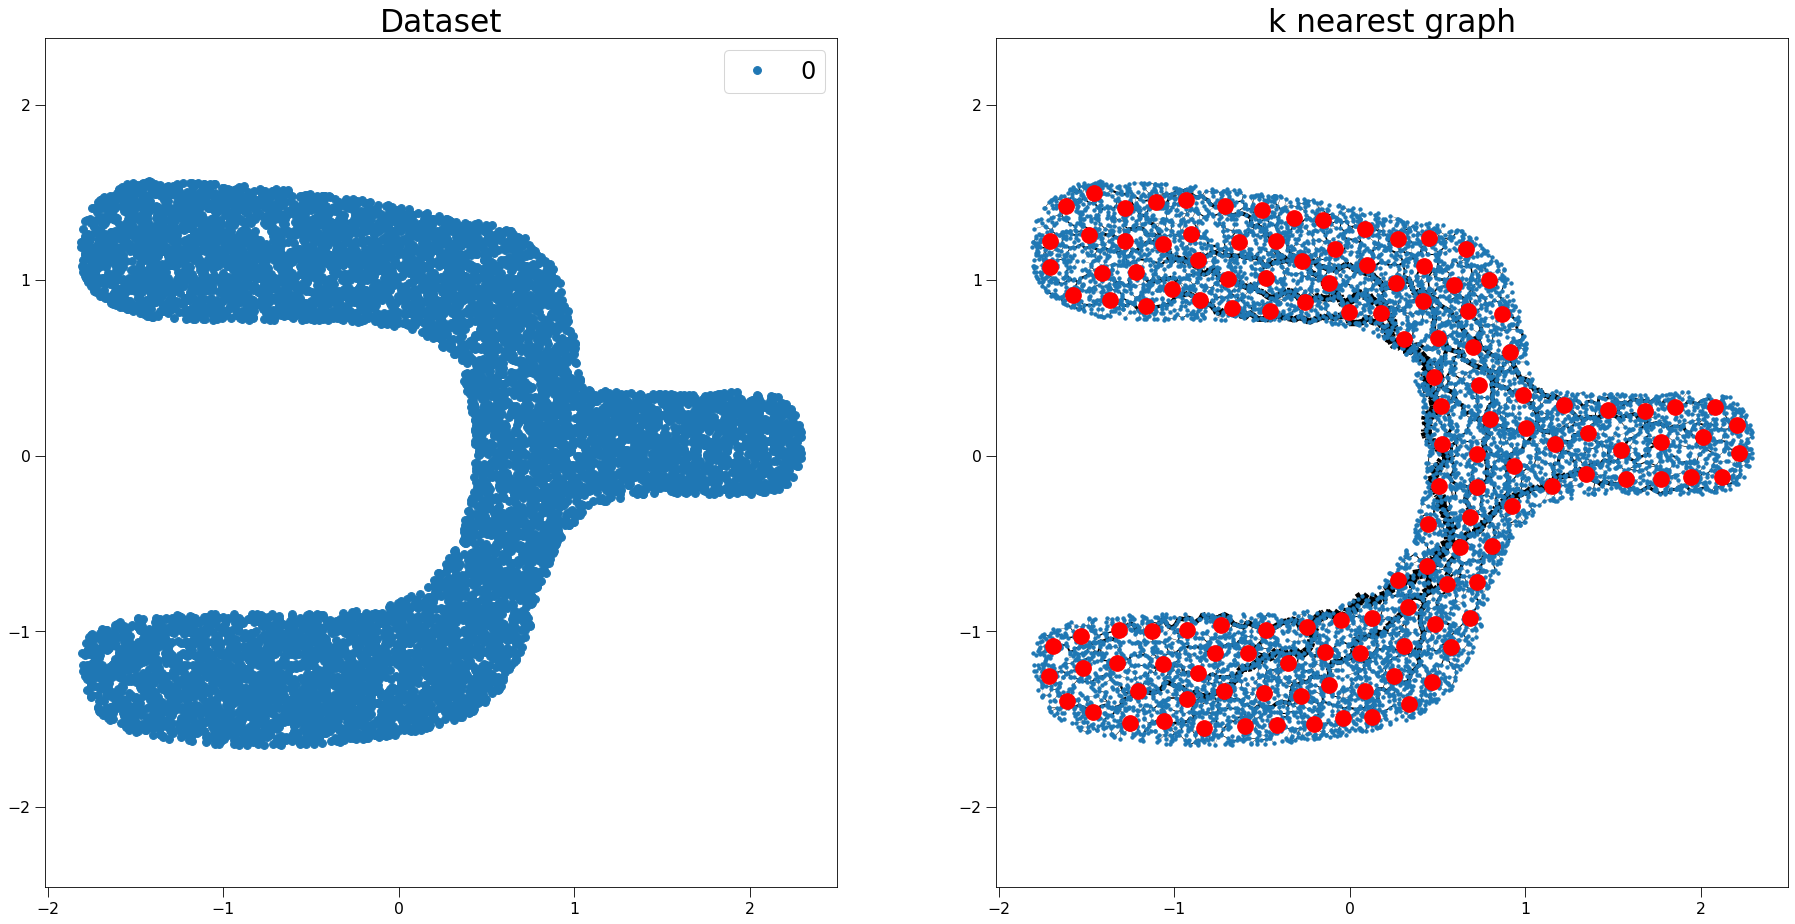

In [7]:
# Compute the position array
img = load_image(image_name)
position = np.array(sample_points_from_image(n,img,Random)).T
position = StandardScaler().fit_transform(position)

# Compute knearest graph
cluster_centers = centers(position)
G, _ = create_graph(number_of_nodes, mode, position=position, beta=2, delta=0.5)
G.indexEdges()

# Plot the prepared data
fig, axs = plt.subplots(1, 2)
plot_points(position, "Dataset", axs[0])
plot_graph(G, position, "k nearest graph", axs[1], cluster_centers)
plt.show()

In [8]:
ICT = calculate_ICT(G, algorithm_type=ICT_algorithm, cluster_centers=cluster_centers,
                                zeros_stay_zeros=True, update_G=1.1)
ICT.indexEdges()

None
[]


create edgeId array:   0%|          | 0/62388 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/62388 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/9999 [00:00<?, ?it/s]

update Arr 62388 -> 16366
added 145 edges early
update Arr 16366 -> 14878
added 323 edges early
update Arr 14878 -> 13524
added 423 edges early
update Arr 13524 -> 12293
added 551 edges early
update Arr 12293 -> 11161
added 726 edges early
update Arr 11161 -> 10132
added 836 edges early
update Arr 10132 -> 9999
added 105 edges early
added 4890 edges early


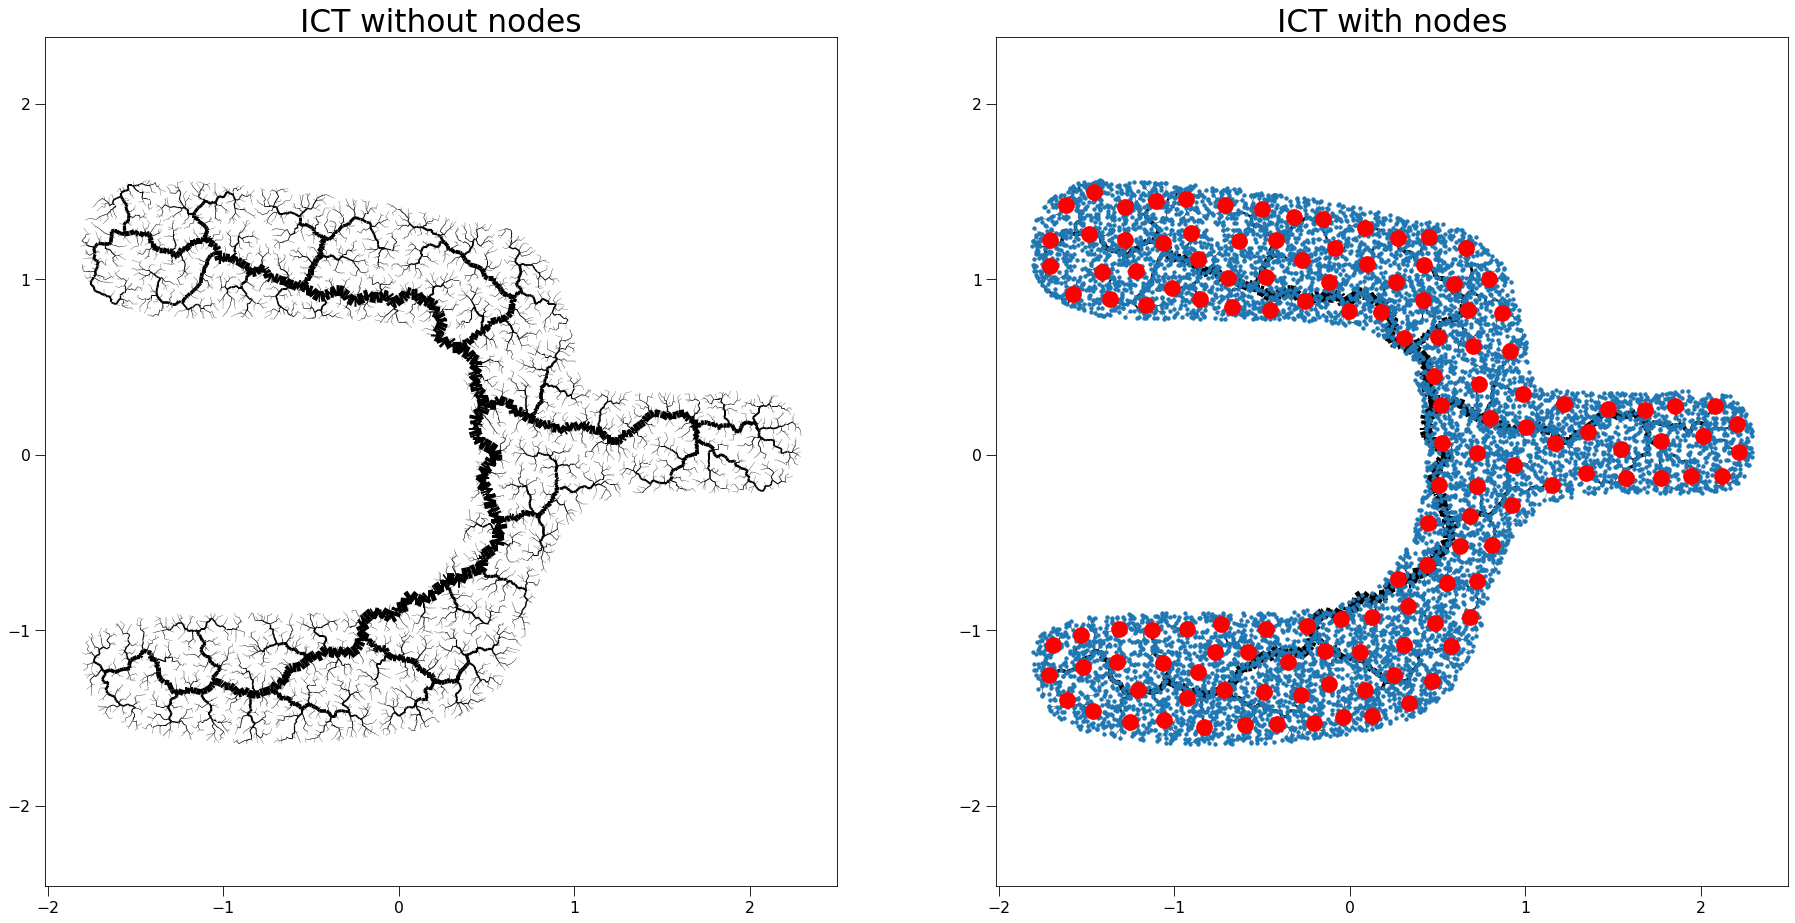

In [16]:
# Plot the ICT
fig, axs = plt.subplots(1, 2)
plot_graph(ICT, position, "ICT with nodes", axs[1], cluster_centers)
plot_graph(ICT, position, "ICT without nodes", axs[0], node_size=0)
plt.savefig(dataset+"-"+parameters+".png")